<a href="https://colab.research.google.com/github/Francisakinrinade/Darey.io-Projects/blob/main/Module_4_mini_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


Natural Language Processing (NLP) significantly benefits the media industry by automating news categorization, enabling faster and more accurate content management. Through NLP algorithms, media platforms can analyze headlines and article content to identify topics, sentiments, and key entities, allowing for real-time classification into categories such as politics, sports, health, or entertainment. This automation not only improves the efficiency of newsroom operations but also enhances user experience by ensuring personalized and relevant content delivery. Moreover, NLP-driven categorization supports large-scale archiving and retrieval, making it easier to manage vast volumes of news data.

---



## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


In [ ]:
!kaggle datasets download -d amananandrai/ag-news-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
License(s): unknown
ag-news-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/ag-news-classification-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

   Class                            Title                                                     Description                         
1    3            Carlyle Looks Toward Commercial Aerospace (Reuters)  Reuters - Private investment firm Carlyle Group,\which h...
2    3                Oil and Economy Cloud Stocks' Outlook (Reuters)  Reuters - Soaring crude prices plus worries\about the ec...
3    3    Iraq Halts Oil Exports from Main Southern Pipeline (Reut...  Reuters - Authorities have halted oil export\flows from ...
4    3    Oil prices soar to all-time record, posing new menace to...  AFP - Tearaway world oil prices, toppling records and st...
5    3                    Stocks End Up, But Near Year Lows (Reuters)  Reuters - Stocks ended slightly higher on Friday\but sta...


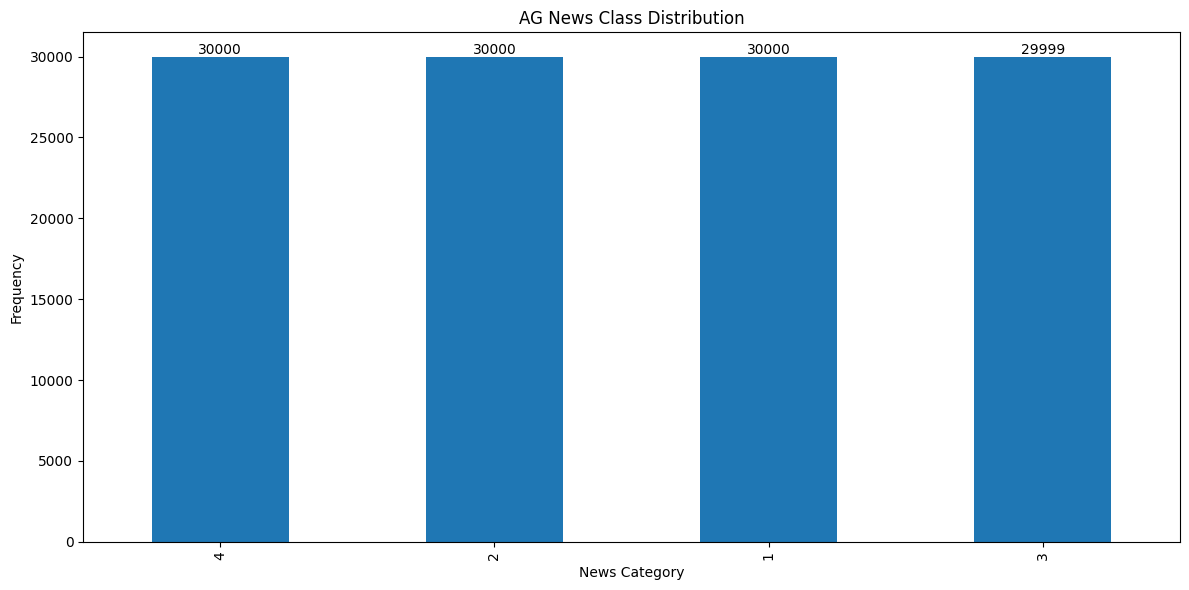

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert dataset to DataFrame for easier manipulation

#Create DataFrame
df = pd.DataFrame(train_df)

# Rename columns based on the structure of train_df
df.columns = ["Class", "Title", "Description"]

# Remove the header row that was read as data
df = df.iloc[1:]


# Organize output
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.colheader_justify', 'center')

#Display organized output
print(df.head())

#Plot Distribution
plt.figure(figsize=(12, 6))
ax = df['Class'].value_counts().plot(kind='bar') # Assign the plot to an axes object
plt.title("AG News Class Distribution")
plt.xlabel("News Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Add annotations to the bars
for container in ax.containers:
    ax.bar_label(container)


plt.tight_layout()
plt.show()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
df['cleaned_sample'] = df['text'].head(1000).apply(preprocess)
print(df[['text', 'cleaned_sample']].head())

                              text                                                    cleaned_sample                       
1  Carlyle Looks Toward Commercial Aerospace (Reuters) Reut...  carlyle look commercial aerospace reuters reuters   priv...
2  Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters ...  oil economy cloud stock outlook reuters reuters   soar c...
3  Iraq Halts Oil Exports from Main Southern Pipeline (Reut...  iraq halt oil export main southern pipeline reuter reute...
4  Oil prices soar to all-time record, posing new menace to...  oil price soar alltime record pose new menace economy af...
5  Stocks End Up, But Near Year Lows (Reuters) Reuters - St...  stock end near year low reuters reuter   stock end sligh...


In [ ]:
import spacy
import re
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Check if text is not None and is a string
    if text is not None and isinstance(text, str):
        # Remove numbers and special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Filter out tokens that are stopwords, punctuation, or the '-PRON-'
        # lemma
        tokens = [token.lemma_ for token in nlp(text.lower()) if not token.is_stop and not token.is_punct and token.lemma_ != '-PRON-']
        return " ".join(tokens)
    else:
        return "" # Return an empty string or handle as appropriate

# Combine 'Title' and 'Description' columns into a new 'text' column
df['text'] = df['Title'].astype(str) + " " + df['Description'].astype(str)

# Apply preprocessing to the combined text
df['cleaned_text'] = df['text'].apply(preprocess)

# Print the head of the DataFrame with original and cleaned text
print(df[['text', 'cleaned_text']].head())

                              text                                                     cleaned_text                        
1  Carlyle Looks Toward Commercial Aerospace (Reuters) Reut...  carlyle look commercial aerospace reuters reuters   priv...
2  Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters ...  oil economy cloud stock outlook reuters reuters   soar c...
3  Iraq Halts Oil Exports from Main Southern Pipeline (Reut...  iraq halt oil export main southern pipeline reuter reute...
4  Oil prices soar to all-time record, posing new menace to...  oil price soar alltime record pose new menace economy af...
5  Stocks End Up, But Near Year Lows (Reuters) Reuters - St...  stock end near year low reuters reuter   stock end sligh...


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000) # Limiting to top 5000 features
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Sample of TF-IDF Matrix (first 2 rows):")
print(tfidf_matrix[:2, :].toarray())

TF-IDF Matrix Shape: (119999, 5000)
Sample of TF-IDF Matrix (first 2 rows):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np
# Bag of Words (BoW) Representation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)
bow_matrix = count_vectorizer.fit_transform(df['cleaned_text'])

print("Bag of Words Matrix Shape:", bow_matrix.shape)
print("Sample of BoW Matrix:", bow_matrix[:2, :].toarray())

# Term Frequency-Inverse Document Frequency (TF-IDF) Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("\nTF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Sample of TF-IDF Matrix:", tfidf_matrix[:2, :].toarray())

Bag of Words Matrix Shape: (119999, 5000)
Sample of BoW Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

TF-IDF Matrix Shape: (119999, 5000)
Sample of TF-IDF Matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare labels (assuming 'Class' is your label column and needs to be numeric)
# Convert 'Class' column to numeric, coercing errors
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

# Drop rows where 'Class' could not be converted to a number (if any)
df.dropna(subset=['Class'], inplace=True)

# Convert labels to integer type for model compatibility
y = df['Class'].astype(int)
X = tfidf_matrix # Use the TF-IDF matrix as features

# Train-Test Split
# Ensure that the number of samples in X and y are the same before splitting
if X.shape[0] == y.shape[0]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution
else:
    print(f"Mismatch in number of samples: X has {X.shape[0]} samples, y has {y.shape[0]} samples. Cannot split.")
    # You might need to re-run previous steps or inspect df and tfidf_matrix


# Logistic Regression Model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.07%


### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.